<a href="https://colab.research.google.com/github/Harmokay/The-Beginning/blob/main/Lecture_7_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In this notebook, we apply four classifiers, namely, SVM, RF, KNN, and DT to the cancer dataset

# Importing necessary libraries

In [2]:
from google.colab import files
uploaded = files.upload()

Saving cancer .csv to cancer .csv


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the cancer dataset

In [6]:
# Replace the path with the data path on your hard disk
data=pd.read_csv('cancer .csv')

# Exploring and cleaning data

In [7]:
data.shape

(569, 31)

In [9]:
data.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 16  concavit

In [11]:
data.Diagnosis.unique()

array(['M', 'B'], dtype=object)

In [12]:
data.isna().sum()

,0
radius1,0
texture1,0
perimeter1,0
area1,0
smoothness1,0
compactness1,0
concavity1,0
concave_points1,0
symmetry1,0
fractal_dimension1,0


# Preparing data for classification

In [14]:
data. Diagnosis.value_counts()

,count
Diagnosis,
B,357
M,212


[]

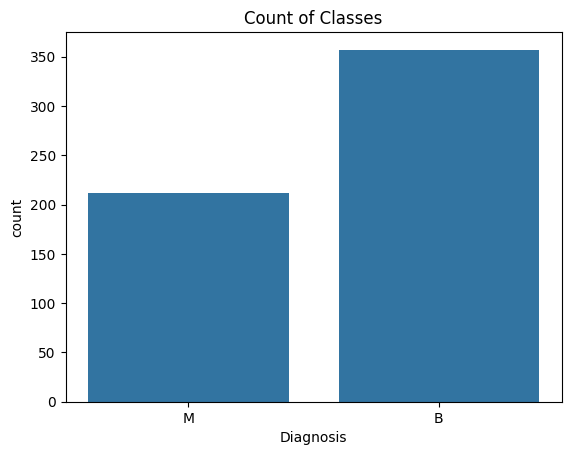

In [17]:
sns.countplot(x= 'Diagnosis', data=data)
plt.title("Count of Classes")
plt.plot()

In [18]:
#Extracting input and output data
X=data.drop('Diagnosis',axis=1)
y=data.iloc[:,30]

In [19]:
y

,Diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


In [20]:
#normalising the input data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X=scaler.fit_transform(X)

In [21]:
X

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

In [22]:
#encoding the output data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(y)

In [23]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [24]:
# splittig the dataset into train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [25]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(483, 30)
(483,)
(86, 30)
(86,)


# Classification

In [26]:
# Step 1: defining the classification models
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
SVM = svm.SVC()
RF = RandomForestClassifier()
KNN = KNeighborsClassifier()
DT=DecisionTreeClassifier()

In [27]:
#Step 2: training the models
SVM.fit(X_train, y_train)
RF.fit(X_train, y_train)
KNN.fit(X_train, y_train)
DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
#Step 3: prediction
y_pred1=SVM.predict(X_test)
y_pred2=RF.predict(X_test)
y_pred3=KNN.predict(X_test)
y_pred4=DT.predict(X_test)

Text(0.5, 1.0, 'DT')

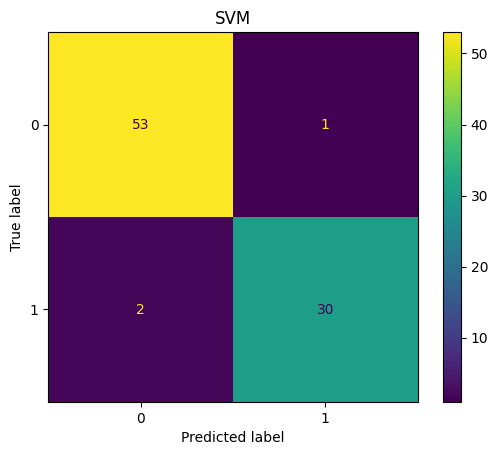

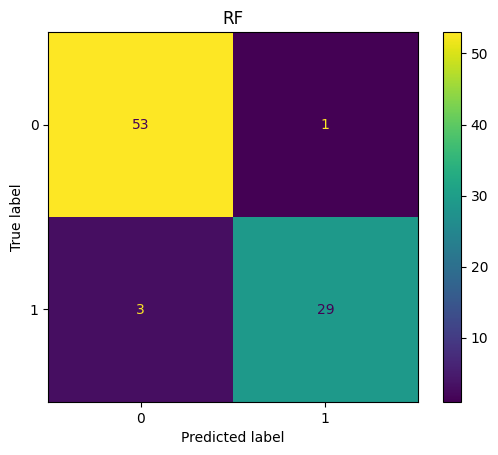

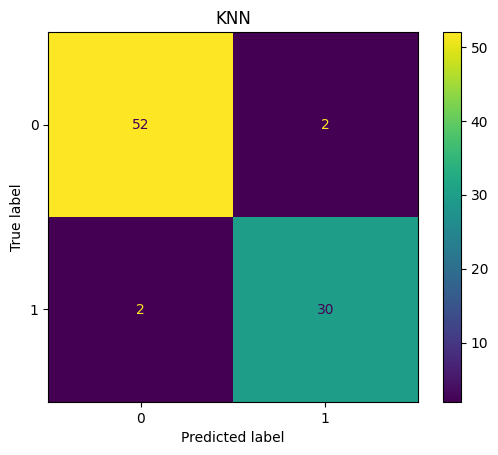

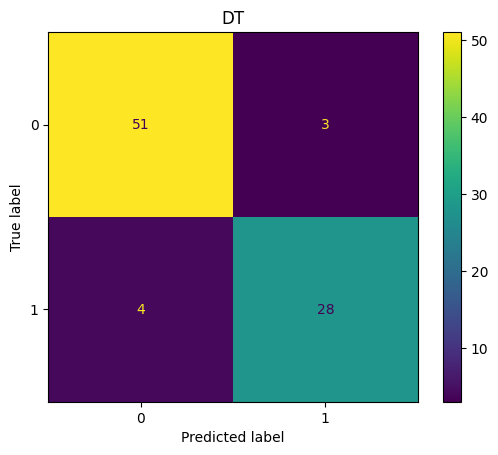

In [29]:
# Creating the confusion matrics for all classifiers' predictions
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm1 = confusion_matrix(y_test, y_pred1, labels=SVM.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=SVM.classes_)
disp.plot()
plt.title("SVM")

cm2 = confusion_matrix(y_test, y_pred2, labels=RF.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=RF.classes_)
disp.plot()
plt.title("RF")


cm3 = confusion_matrix(y_test, y_pred3, labels=KNN.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm3,display_labels=KNN.classes_)
disp.plot()
plt.title("KNN")

cm4 = confusion_matrix(y_test, y_pred4, labels=DT.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm4,display_labels=DT.classes_)
disp.plot()
plt.title("DT")


In [30]:
# This function takes the confusion matrix (cm) from the cell above and produces all evaluation matrix
def confusion_metrics (conf_matrix):

    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)

    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))

    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy

    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))

    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy: {round(conf_accuracy,2)}')
    print(f'Mis-Classification: {round(conf_misclassification,2)}')
    print(f'Sensitivity: {round(conf_sensitivity,2)}')
    print(f'Specificity: {round(conf_specificity,2)}')
    print(f'Precision: {round(conf_precision,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')

In [31]:
#printing the evaluation metrics for all classifiers
print('SVM metrics\n')
confusion_metrics(cm1)
print('\n\n')
print('RF metrics\n')
confusion_metrics(cm2)
print('\n\n')
print('KNN metrics\n')
confusion_metrics(cm3)
print('\n\n')
print('DT metrics\n')
confusion_metrics(cm4)
print('\n\n')

SVM metrics

True Positives: 30
True Negatives: 53
False Positives: 1
False Negatives: 2
--------------------------------------------------
Accuracy: 0.97
Mis-Classification: 0.03
Sensitivity: 0.94
Specificity: 0.98
Precision: 0.98
f_1 Score: 0.96



RF metrics

True Positives: 29
True Negatives: 53
False Positives: 1
False Negatives: 3
--------------------------------------------------
Accuracy: 0.95
Mis-Classification: 0.05
Sensitivity: 0.91
Specificity: 0.98
Precision: 0.98
f_1 Score: 0.94



KNN metrics

True Positives: 30
True Negatives: 52
False Positives: 2
False Negatives: 2
--------------------------------------------------
Accuracy: 0.95
Mis-Classification: 0.05
Sensitivity: 0.94
Specificity: 0.96
Precision: 0.96
f_1 Score: 0.95



DT metrics

True Positives: 28
True Negatives: 51
False Positives: 3
False Negatives: 4
--------------------------------------------------
Accuracy: 0.92
Mis-Classification: 0.08
Sensitivity: 0.88
Specificity: 0.94
Precision: 0.94
f_1 Score: 0.91

